In [1]:
# Dependencies
import pandas as pd
import requests

DOWNLOAD AND PLOT THE DATASET

In [2]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('last_clean_ready.csv', header=0, index_col=0)
print(series.head())

          Magnitude
New_date           
1/7/2020       1.09
1/7/2020       1.11
1/7/2020       1.02
1/7/2020       0.85
1/7/2020       0.99


In [3]:
series.sort_values("New_date", ascending=False, inplace=True)
series.head()

,Magnitude
New_date,
12/9/2019,1.04
12/9/2019,0.95
12/9/2019,0.52
12/9/2019,0.74
12/9/2019,0.40


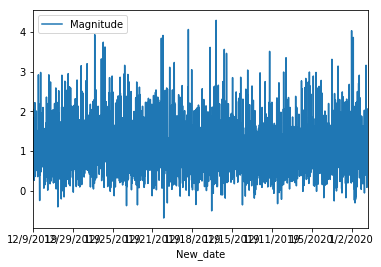

In [4]:
series.plot()
# pyplot.figure(figsize= ("100, 200"))
pyplot.show()

SELECT TIME SERIES FORECAST MODEL

In [5]:
# value(t) = obs(t) - obs(t - 1)
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy

In [6]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

In [7]:
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

In [8]:
# series = read_csv('last_clean_ready.csv', header=0, index_col=0)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

In [9]:
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params

In [10]:
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.365


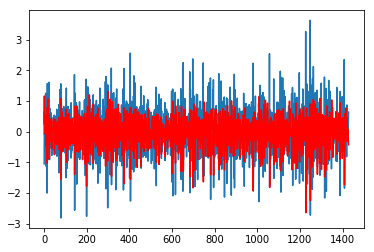

In [11]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

FINALIZE AND SAVE TIME SERIES FORECAST MODEL

In [12]:
# fit an AR model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy

In [13]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

In [14]:
# load dataset
# series = read_csv('last_clean_ready.csv', header=0, index_col=0)
X = difference(series.values)

In [15]:
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)

In [16]:
# save model to file
model_fit.save('ar_model.pkl')

In [17]:
# save the differenced dataset
numpy.save('ar_data.npy', X)

In [18]:
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [19]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 4.03494051e-04 -8.01917373e-01 -6.45592221e-01 -4.90293401e-01
 -3.89520449e-01 -2.83568301e-01 -1.57126446e-01]
[[2.06]]


In [20]:
# fit an AR model and manually save coefficients to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AR
import numpy

In [21]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

In [22]:
# load dataset
# series = read_csv('last_clean_ready.csv', header=0, index_col=0)
X = difference(series.values)

In [23]:
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)

In [24]:
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)

In [25]:
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)

In [26]:
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])
print(last_ob)

[[2.06]]


In [27]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 4.03494051e-04 -8.01917373e-01 -6.45592221e-01 -4.90293401e-01
 -3.89520449e-01 -2.83568301e-01 -1.57126446e-01]
[[ 0.45]
 [-0.12]
 [-0.28]
 [ 0.55]
 [ 0.22]
 [ 0.64]]
[[2.06]]


MAKE A TIME SERIES FORECAST

In [28]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')

In [29]:
# make prediction
predictions = model.predict(start=len(data), end=len(data))

In [30]:
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 1.207872


In [31]:
# load a coefficients and from file and make a manual prediction
import numpy
 
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
        return yhat

In [32]:
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')

In [33]:
# make prediction
prediction = predict(coef, lag)

In [34]:
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 1.547176


UPDATE FORECAST MODEL

In [35]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48

In [36]:
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')

In [37]:
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)

In [38]:
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

In [39]:
# update the data for the manual model with a new obs
import numpy

In [40]:
# get real observation
observation = 48

In [41]:
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)

In [42]:
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)